# Clustering and Classification

## Import Libaraies and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

C:\Users\USER\AppData\Local\Temp\ipykernel_11396\1950509223.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


In [2]:
data = pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.rename(columns={'species': 'class'}, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.duplicated().sum()

3

In [6]:
data.drop_duplicates(inplace=True)

## Distributions of Features

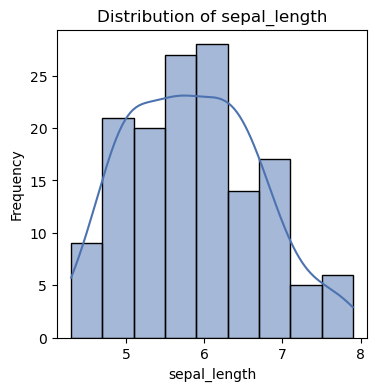

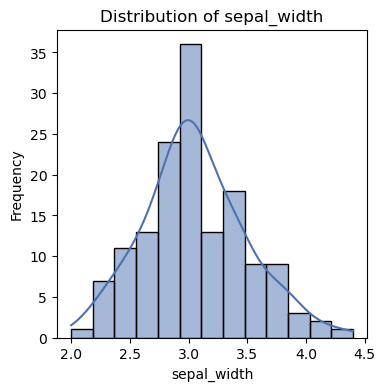

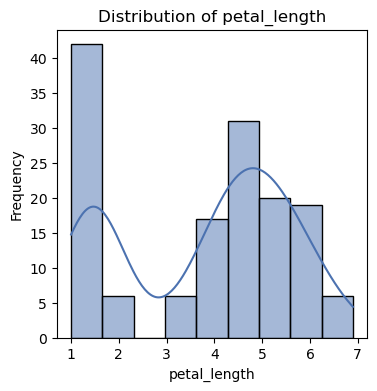

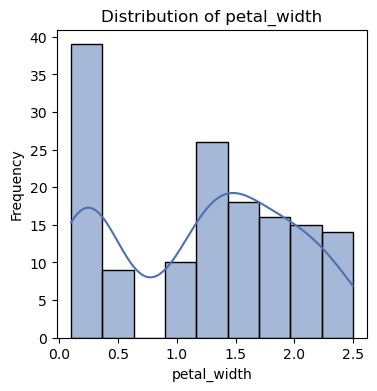

In [7]:
for feature in data.drop(columns='class'):
    plt.figure(figsize=(4, 4)) 
    sns.histplot(data=data, x=feature, kde=True)  
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')  
    plt.title(f'Distribution of {feature}') 
    plt.show()

### Outlier Anaysis

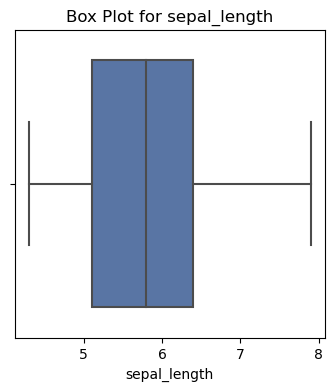

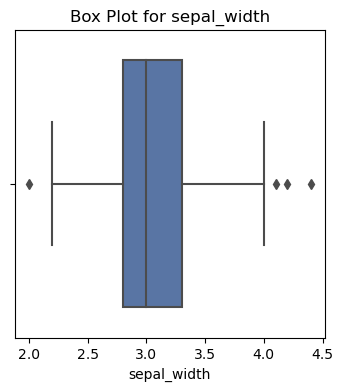

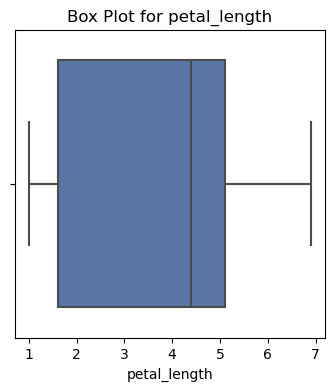

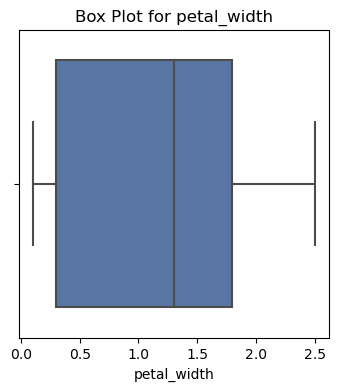

In [9]:
features = [col for col in data.columns if col != 'class']
for feature in features:
    plt.figure(figsize=(4, 4)) 
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

In [10]:
lower , upper = data['sepal_width'].quantile([0.02,0.98]).to_list()
df = data[data['sepal_width'].between(lower,upper)]

<Axes: xlabel='sepal_width'>

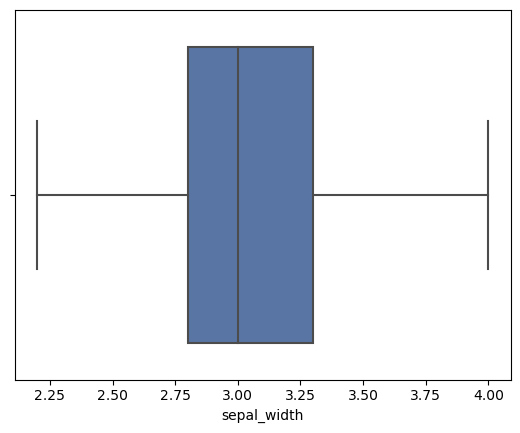

In [11]:
sns.boxplot(x=df['sepal_width'])

## Scatter plot

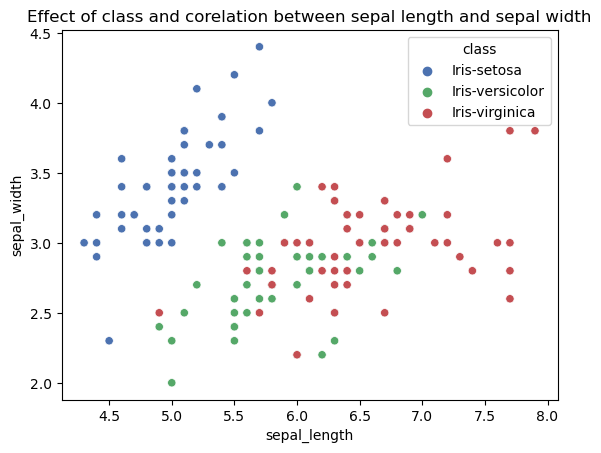

In [12]:
sns.scatterplot(data=data, x='sepal_length',y='sepal_width', hue='class')
plt.title('Effect of class and corelation between sepal length and sepal width');

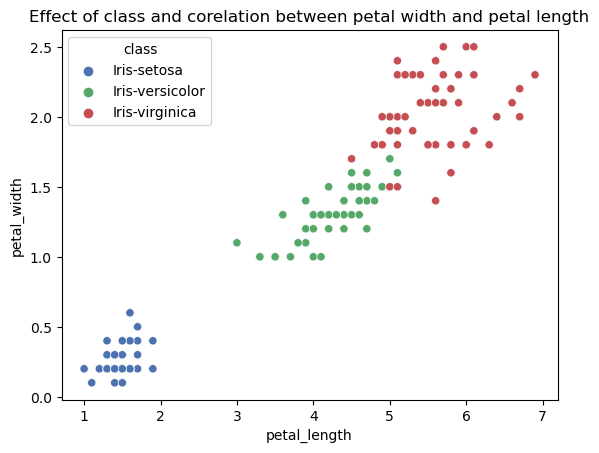

In [13]:
sns.scatterplot(data=data, x='petal_length',y='petal_width', hue='class')
plt.title('Effect of class and corelation between petal width and petal length');

### Corelation between fearures

In [14]:
corealtion = data.drop(columns='class').corr()
corealtion

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


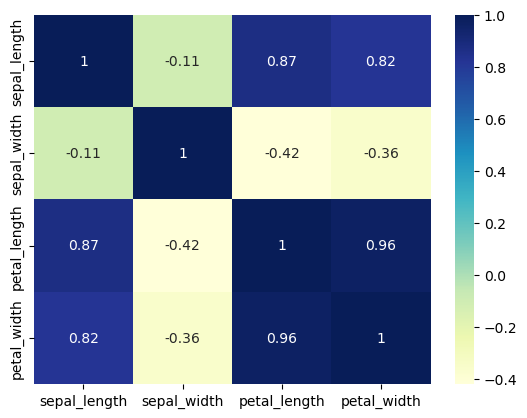

In [15]:
sns.heatmap(corealtion, annot=True, cmap='YlGnBu');

In [16]:
data.drop(columns=['sepal_length'], inplace=True)

## Splitting Data

In [17]:
target = 'class'
X = df.drop(columns=target)
y = df[target]

## Model Building
### K-Means 

In [18]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [19]:
k_means = make_pipeline(
    MinMaxScaler(),
    KMeans(n_clusters=3, random_state=42)
)

### Model trainig

In [20]:
k_means.fit(X)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [21]:
labels = k_means.named_steps['kmeans'].labels_
centroids = k_means.named_steps['kmeans'].cluster_centers_

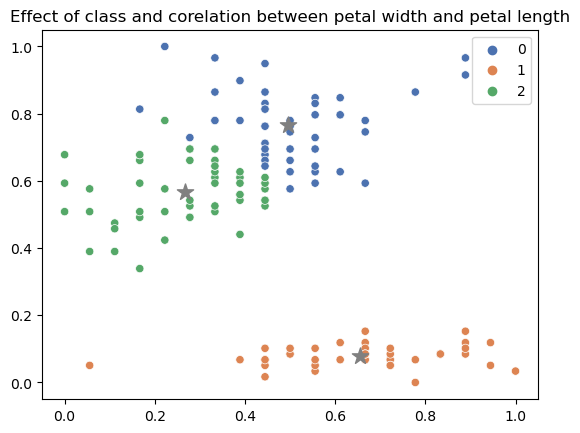

In [22]:
X_transformed = k_means.named_steps['minmaxscaler'].fit_transform(X)
sns.scatterplot(x=X_transformed[:,1],y=X_transformed[:,2], hue=labels, palette='deep')
plt.scatter(x=centroids[:,1], y=centroids[:,2], color='gray',marker='*',s=150)
plt.title('Effect of class and corelation between petal width and petal length');

### Plot 2D scatter plot using PCA

In [23]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
X_pca = pca.fit_transform(X)


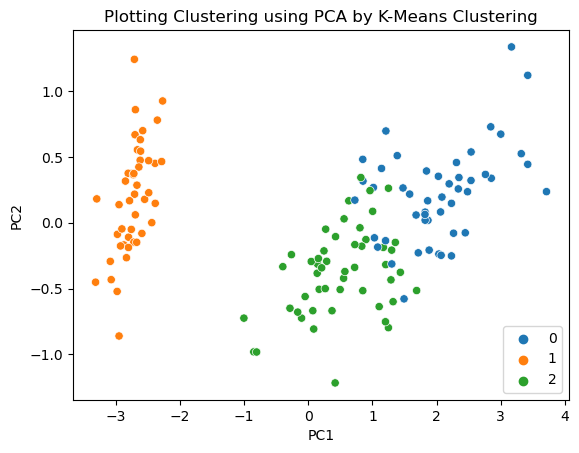

In [24]:
color_palette = sns.color_palette('tab10', n_colors=len(set(labels)))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=color_palette)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Plotting Clustering using PCA by K-Means Clustering");

### Building KNN Model

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix, make_scorer

In [26]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [28]:
knn = make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=3)
)

**Train the model**

In [29]:
knn.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [51]:
# Define the parameter grid with the hyperparameters and their values to search
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

In [52]:
# Create the GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object on the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy')

In [53]:
# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}


In [54]:
# Get the best model found by grid search
best_knn = grid_search.best_estimator_

**Best model choosing**

In [56]:
best_knn.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

#### Model Evaliuation

In [57]:
y_train_pred = best_knn.predict(X_train)
y_train_pred[:5]

array([1, 0, 2, 0, 0])

In [58]:
accuracy_score(y_train, y_train_pred)

0.9736842105263158

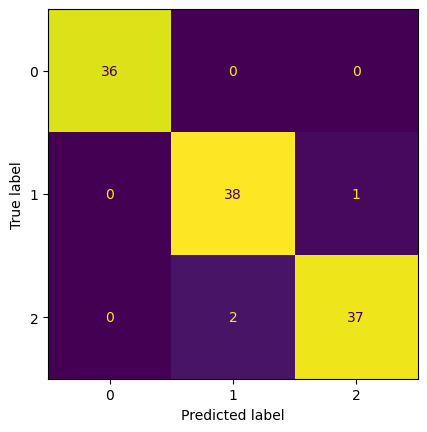

In [60]:
ConfusionMatrixDisplay.from_estimator(knn,X_train, y_train, colorbar=False, cmap='viridis');

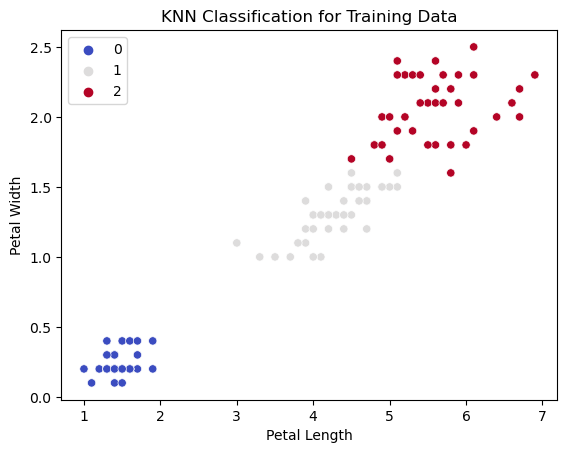

In [72]:
# Create a scatter plot of the data points colored by labels
sns.scatterplot(x=X_train['petal_length'], y=X_train['petal_width'], hue=y_train_pred, palette='coolwarm')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN Classification for Training Data')
plt.show()

#### Make predictions

In [63]:
y_test_pred = knn.predict(X_test)

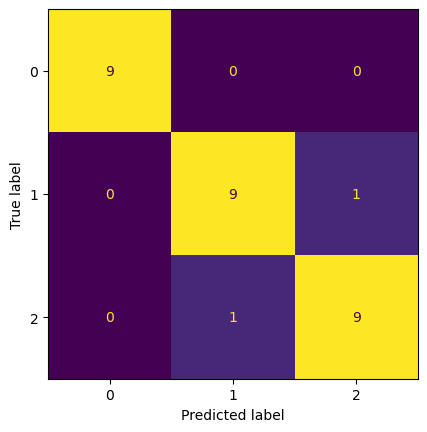

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, colorbar=False, cmap='viridis');

In [66]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



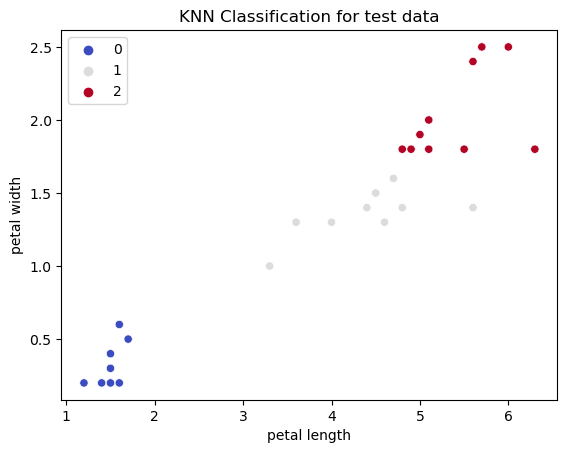

In [73]:
# Create a scatter plot of the data points colored by labels for testing data
sns.scatterplot(x=X_test['petal_length'], y=X_test['petal_width'],hue=y_test_pred, palette='coolwarm')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('KNN Classification for test data')
plt.show()

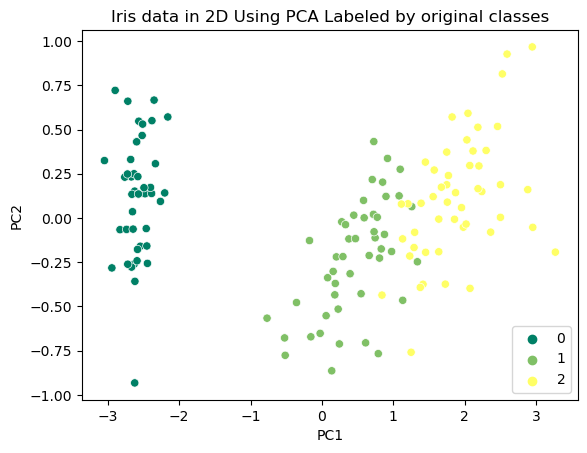

In [74]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],hue=y, palette='summer')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris data in 2D Using PCA Labeled by original classes')
plt.show()